In [222]:
import joblib
from nltk.tokenize import sent_tokenize
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [223]:
folder = 'POS-tagger-portuguese-nltk-master/trained_POS_taggers/'
tagger = joblib.load(folder+'POS_tagger_brill.pkl')

In [224]:
df = pd.DataFrame(columns=['File_Name', 'Text_Content'])

for file_name in os.listdir("corpus/gpt"):
    if file_name.endswith('.txt'):
        file_path = os.path.join("corpus/gpt", file_name)
        with open(file_path, 'r') as file:
            text_content = file.read()
        # Append a new row to the DataFrame
        df = pd.concat([df, pd.DataFrame({'File_Name': [file_name[:-4]], 'Text_Content': [text_content]})], ignore_index=True)
df.head()

,File_Name,Text_Content
0,gpt1,A invisibilidade do trabalho de cuidado realiz...
1,gpt2,Título: Reconhecimento e Valorização do Trabal...
2,gpt3,A invisibilidade do trabalho de cuidado realiz...
3,gpt4,Desafios para o Enfrentamento da Invisibilidad...
4,gpt5,Título: Valorizando o Trabalho de Cuidado Femi...


In [225]:
df.loc[0,"Text_Content"][:100]

'A invisibilidade do trabalho de cuidado realizado pela mulher no Brasil é um desafio multifacetado q'

In [226]:
sent_tokenize(df.loc[0,"Text_Content"])

['A invisibilidade do trabalho de cuidado realizado pela mulher no Brasil é um desafio multifacetado que permeia as estruturas sociais e culturais do país.',
 'Esta realidade não apenas reflete desigualdades de gênero profundamente enraizadas, mas também subestima a importância vital dessas atividades para a sustentação da sociedade.',
 'Diante desse cenário, urge uma reflexão profunda e a proposição de medidas efetivas para combater essa invisibilidade e promover a equidade de gênero.',
 'A invisibilidade do trabalho de cuidado feminino é, em grande parte, resultado de uma divisão desigual do trabalho.',
 'Historicamente, às mulheres foram atribuídas as responsabilidades domésticas e de cuidado, enquanto os homens foram valorizados pelo trabalho remunerado fora do lar.',
 'Essa divisão persistente do trabalho contribui para a perpetuação da invisibilidade do cuidado feminino, que muitas vezes é desvalorizado e não reconhecido como trabalho legítimo.',
 'Além disso, a falta de política

In [227]:
df["Sentences"] =  df["Text_Content"].apply(sent_tokenize)

In [228]:
df["POS-TAG"] = df["Sentences"].apply(lambda x: [tagger.tag(y.split()) for y in x])

In [229]:
df["grammatical_categories"] = df["POS-TAG"].apply(lambda text: [[word_tag[1] for word_tag in sentence] for sentence in text ])

In [230]:
for i,row in df.iterrows():
    print(row["grammatical_categories"][0])

['ART', 'N', 'KS', 'V', 'PREP', 'N', 'PCP', 'NPROP', 'NPROP', 'NPROP', 'NPROP', 'V', 'ART', 'N', 'PCP', 'PRO-KS-REL', 'N', 'ART', 'N', 'ADJ', 'KC', 'ADJ', 'NPROP', 'NPROP']
['NPROP', 'N', 'KC', 'NPROP', 'NPROP', 'NPROP', 'PREP', 'N', 'NPROP', 'NPROP', 'NPROP', 'ART', 'N', 'N', 'N', 'KS', 'V', 'PREP', 'N', 'PCP', 'N', 'N', 'N', 'NPROP', 'V', 'ART', 'N', 'PRO-KS-REL', 'V', 'ART', 'N', 'N', 'V', 'PREP', 'N', 'NPROP', 'ADJ', 'KC', 'NPROP']
['ART', 'N', 'KS', 'V', 'PREP', 'N', 'PCP', 'N', 'N', 'N', 'NPROP', 'V', 'ART', 'N', 'ADJ', 'PRO-KS-REL', 'N', 'ART', 'N', 'ADJ', 'KC', 'N', 'N']
['N', 'PREP', 'ART', 'N', 'N', 'NPROP', 'NPROP', 'NPROP', 'PREP', 'N', 'PCP', 'NPROP', 'NPROP', 'NPROP', 'NPROP', 'ART', 'N', 'KS', 'V', 'PREP', 'N', 'PCP', 'N', 'N', 'N', 'NPROP', 'V', 'ART', 'N', 'PRO-KS-REL', 'N', 'ADJ', 'N', 'ADJ', 'KC', 'NPROP']
['NPROP', 'V', 'ART', 'N', 'PREP', 'N', 'NPROP', 'NPROP', 'V', 'ADJ', 'ART', 'N', 'KS', 'V', 'PREP', 'N', 'PCP', 'N', 'N', 'N', 'NPROP', 'V', 'ART', 'N', 'PRO-KS-R

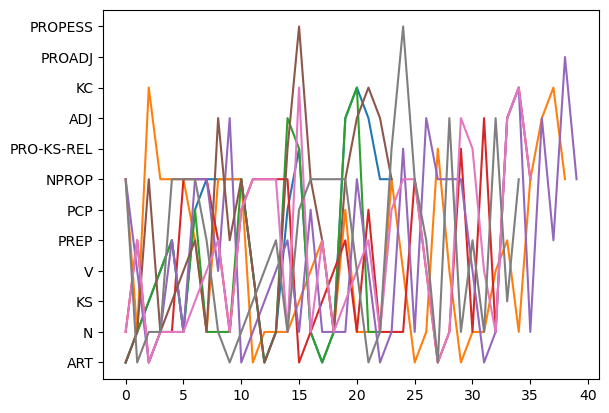

In [231]:
for i, row in df.iterrows():
    plt.plot(range(len(row['grammatical_categories'][0])), row['grammatical_categories'][0], label=f'Row {i+1}')

In [232]:
from collections import Counter
from functools import reduce

def update_row(counter, paragraph):
    num_bigrams = len(paragraph) - 1
    for i, j in zip(paragraph, paragraph[1:]):
        counter[(i, j)] += 1
    for bigram in counter:
        counter[bigram] /= num_bigrams
    return counter


df['bigram_counts'] = df['grammatical_categories'].apply(lambda text: reduce(update_row, [Counter()] + text))
c = df['bigram_counts'].sum() 

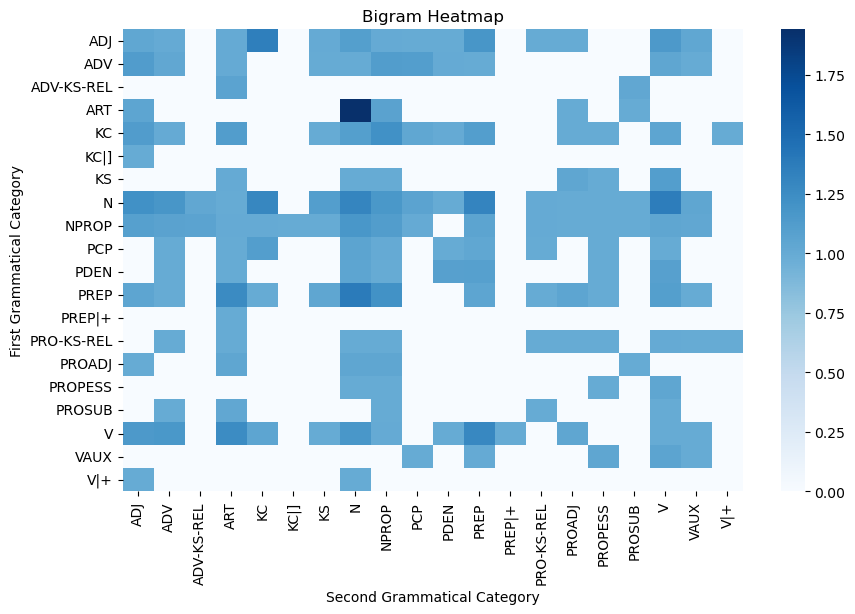

In [233]:
# Convert Counter to DataFrame for plotting
data = {'First': [], 'Second': [], 'Count': []}
for (first, second), count in c.items():
    data['First'].append(first)
    data['Second'].append(second)
    data['Count'].append(np.exp(count))
    
df_heatmap = pd.DataFrame(data)
# Pivot the DataFrame for heatmap
heatmap_data = df_heatmap.pivot_table(index='First', columns='Second', values='Count', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='Blues')
plt.title('Bigram Heatmap')
plt.xlabel('Second Grammatical Category')
plt.ylabel('First Grammatical Category')
plt.show()